In [1]:
import pickle

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, median_absolute_error
from sklearn.model_selection import train_test_split

import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm

%matplotlib inline

In [2]:
with open('end-part1_df.pkl', 'rb') as fp:
    df = pickle.load(fp)

In [3]:
# df = pd.read_csv('end-part2_df.csv').set_index('date')

In [4]:
df.head()

,meantempm,maxtempm,mintempm,meantempm_1,meantempm_2,meantempm_3,meandewptm_1,meandewptm_2,meandewptm_3,meanpressurem_1,...,mindewptm_3,maxpressurem_1,maxpressurem_2,maxpressurem_3,minpressurem_1,minpressurem_2,minpressurem_3,precipm_1,precipm_2,precipm_3
date,,,,,,,,,,,,,,,,,,,,,
2015-10-06 22:13:06.559948,23.0,30.0,17.0,24.0,22.0,21.0,11.0,8.0,6.0,1018.0,...,4.0,1020.0,1017.0,1014.0,1015.0,1013.0,1010.0,0.0,0.0,0.0
2015-10-07 22:13:06.559948,24.0,32.0,17.0,23.0,24.0,22.0,11.0,11.0,8.0,1019.0,...,7.0,1022.0,1020.0,1017.0,1017.0,1015.0,1013.0,0.0,0.0,0.0
2015-10-08 22:13:06.559948,26.0,32.0,19.0,24.0,23.0,24.0,13.0,11.0,11.0,1017.0,...,8.0,1020.0,1022.0,1020.0,1015.0,1017.0,1015.0,0.0,0.0,0.0
2015-10-09 22:13:06.559948,26.0,30.0,22.0,26.0,24.0,23.0,17.0,13.0,11.0,1017.0,...,8.0,1019.0,1020.0,1022.0,1015.0,1015.0,1017.0,0.0,0.0,0.0
2015-10-10 22:13:06.559948,24.0,30.0,18.0,26.0,26.0,24.0,17.0,17.0,13.0,1020.0,...,10.0,1022.0,1019.0,1020.0,1017.0,1015.0,1015.0,0.0,0.0,0.0


In [5]:
df_corr = df.corr()[['meantempm']].sort_values('meantempm')

In [6]:
df_corr_fil = df_corr[abs(df_corr['meantempm']) > 0.55]

In [7]:
unwanted = ['mintempm', 'maxtempm', 'meantempm']
predictors = df_corr_fil.index.tolist()
predictors = [i for i in predictors if i not in unwanted]

In [8]:
df2 = df[['meantempm'] + predictors]

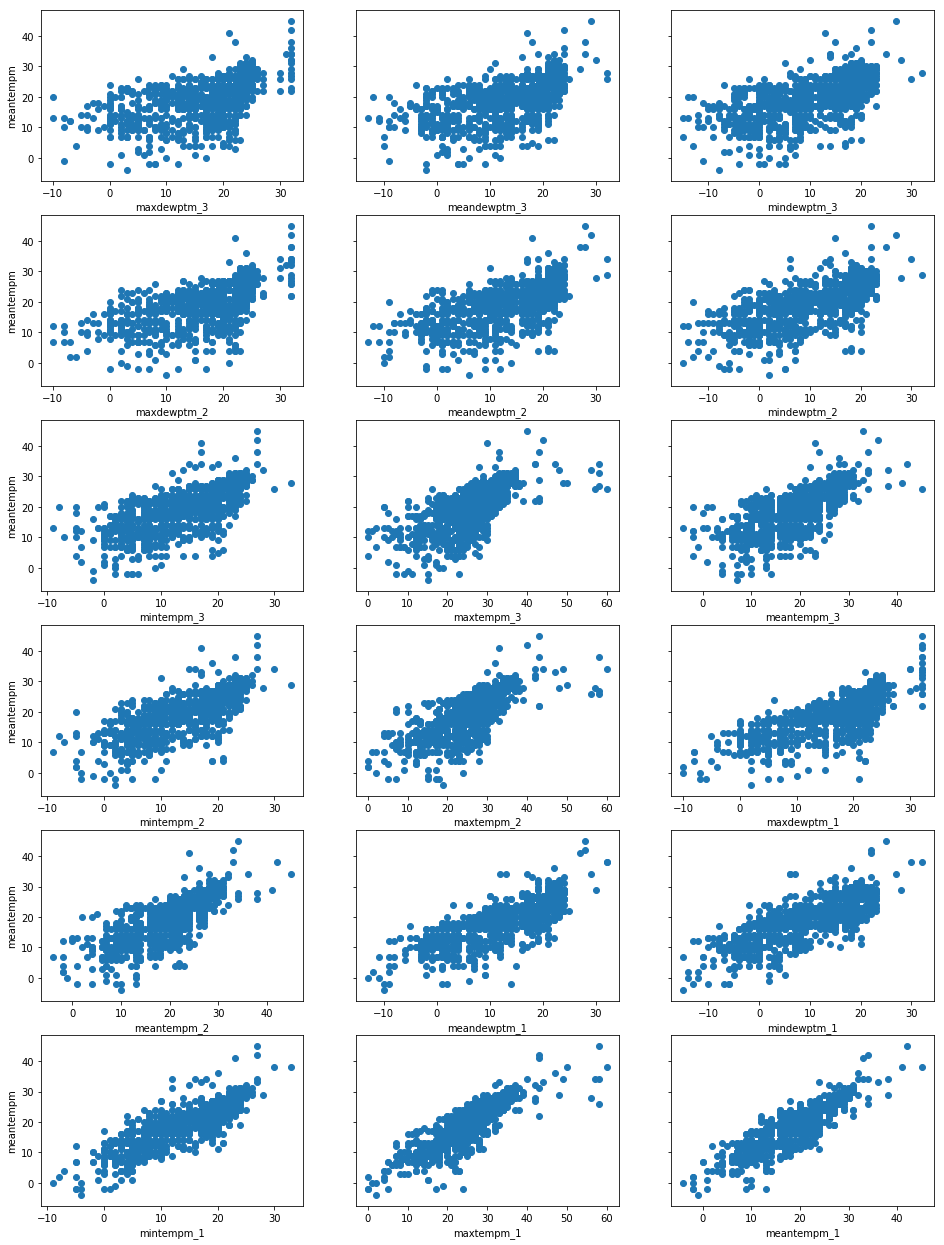

In [9]:
# manually set the parameters of the figure to an appropriate size
plt.rcParams['figure.figsize'] = [16, 22]

# call subplots specifying the grid structure we desire and that
# the y axes should be shared
fig, axes = plt.subplots(nrows=6, ncols=3, sharey=True)

# Since it would be nice to loop through the features in to build this plot
# let us rearrange our data into a 2D array of 6 rows and 3 columns
arr = np.array(predictors).reshape(6, 3)

# use enumerate to loop over the arr 2D array of rows and columns
# and create scatter plots of each meantempm vs each feature
for row, col_arr in enumerate(arr):
    for col, feature in enumerate(col_arr):
        axes[row, col].scatter(df2[feature], df2['meantempm'])
        if col ==0:
            axes[row, col].set(xlabel=feature, ylabel='meantempm')
        else:
            axes[row, col].set(xlabel=feature)
plt.show()

In [10]:
# separate the predictor variables (X) from the outcome variable y
X = df2[predictors]
y = df2['meantempm']

# Add a constant to the predictor variable set to represent the Bo intercept
# X = sm.add_constant(X)
X.iloc[:5, :5]

,maxdewptm_3,meandewptm_3,mindewptm_3,maxdewptm_2,meandewptm_2
date,,,,,
2015-10-06 22:13:06.559948,8.0,6.0,4.0,10.0,8.0
2015-10-07 22:13:06.559948,10.0,8.0,7.0,13.0,11.0
2015-10-08 22:13:06.559948,13.0,11.0,8.0,14.0,11.0
2015-10-09 22:13:06.559948,14.0,11.0,8.0,16.0,13.0
2015-10-10 22:13:06.559948,16.0,13.0,10.0,20.0,17.0


In [11]:
alpha = 0.01

def stepwise_selection(X, y, 
                       initial_list=predictors,  
                       threshold_out=alpha, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(X, y)

print('resulting features:')
print(result)

Drop maxtempm_2                     with p-value 0.773688
Drop meandewptm_2                   with p-value 0.39318
Drop maxdewptm_3                    with p-value 0.348998
Drop meandewptm_3                   with p-value 0.179861
Drop mintempm_2                     with p-value 0.20512
Drop meantempm_2                    with p-value 0.223981
Drop meantempm_3                    with p-value 0.109188
Drop mintempm_3                     with p-value 0.0549466
Drop maxdewptm_1                    with p-value 0.0442908
resulting features:
['mindewptm_3', 'maxdewptm_2', 'mindewptm_2', 'maxtempm_3', 'meandewptm_1', 'mindewptm_1', 'mintempm_1', 'maxtempm_1', 'meantempm_1']


In [12]:
X = X[result]
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              meantempm   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     5979.
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        20:08:07   Log-Likelihood:                -2443.9
No. Observations:                 987   AIC:                             4906.
Df Residuals:                     978   BIC:                             4950.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
mindewptm_3      0.0821      0.022      3.665      0.000       0.038       0.126
maxdewptm_2     -0.1758      0.027     -6.533      0.000      -0.229      -0.123
mindewptm_2     -0.1459      0.029     -5.081      0.000      -0.202      -0.090
maxtempm_3       0.1630      0.021      7.908      0.000       0.123       0.203
meandewptm_1    -0.1103      0.052     -2.118      0.034      -0.212      -0.008
mindewptm_1      0.2859      0.044      6.537      0.000       0.200       0.372
mintempm_1       0.7105      0.135      5.260      0.000       0.445       0.976
maxtempm_1       0.8414      0.126      6.673      0.000       0.594       1.089
meantempm_1     -0.7120      0.254     -2.806      0.005      -1.210      -0.214
==============================================================================
Omnibus:                      102.494   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              256.945
Skew:                          -0.570   Prob(JB):                     1.60e-56
Kurtosis:                       5.224   Cond. No.                         193.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=12)

In [14]:
# instantiate the regressor class
regressor = LinearRegression()

# fit the model by fitting the regressor to the training data
regressor.fit(X_train, y_train)

# make a prediction set using the test set
prediction = regressor.predict(X_test)

# Evaluate the prediction accuracy of the model 
print('The Explained Variance: %.2f' % regressor.score(X_test, y_test))
print('The Mean Absolute Error: %.2f degrees celcius' % mean_absolute_error(
    y_test, prediction))
print('The Median Absolute Error: %.2f degrees celcius' %
      median_absolute_error(y_test, prediction))

The Explained Variance: 0.85
The Mean Absolute Error: 2.10 degrees celcius
The Median Absolute Error: 1.30 degrees celcius
